# Precios de propiedades de alquiler en la ciudad de Nueva York.
* ## En este proyecto tengo pensado hacer un análisis exploratorio en general.
* ## tambien elegi este tipo de datasets por que se puede usar varios modelos predictivos en general.
* ## la base de datos fue extraida de http://www.kaggle.com
-----
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
* ## Podremos contestar las siguientes preguntas :
    * ### Barrio "mas caro".
    * ### Clasificar los tipo de habitación en función a sus caracteristicas.
    * ### Determinar el precio que puede costar segun su habitación y ubicación. ******
    * ### Podriamos agrupar basados en las caracteristicas que tengamos de precios ******

In [1]:
import pandas as pd
import numpy as np
## ## ##
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Cargamos el dataset y vemos que tipos de contenido los compone
data = pd.read_csv("./NY Realstate Pricing.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17614 entries, 0 to 17613
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   F1                     17614 non-null  int64  
 1   id                     17614 non-null  int64  
 2   neighbourhood          17614 non-null  object 
 3   latitude               17614 non-null  float64
 4   longitude              17614 non-null  float64
 5   room_type              17614 non-null  object 
 6   price                  17614 non-null  int64  
 7   days_occupied_in_2019  17614 non-null  int64  
 8   minimum_nights         17614 non-null  int64  
 9   number_of_reviews      17614 non-null  int64  
 10  reviews_per_month      17614 non-null  float64
 11  availability_2020      17614 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1.6+ MB


**Observación**
* Podemos ver que tenemos 17614 filas y 12 columnas


----
**Cambiaremos los nombres de las columnas para que sea mas legible**

In [3]:
data = data.rename(columns={"neighbourhood":"barrio", "latitude":"latitud","longitude":"longitud",
                           "room_type":"tipo_habitacion","price":"precio","days_occupied_in_2019":"dias_ocupados_2019",
                           "minimum_nights":"noches_minimas","number_of_reviews":"numeros_reseñas",
                           "reviews_per_month":"reseñas_por_mes","availability_2020":"disponibilidad_2020"})
data.head()

,F1,id,barrio,latitud,longitud,tipo_habitacion,precio,dias_ocupados_2019,noches_minimas,numeros_reseñas,reseñas_por_mes,disponibilidad_2020
0,0,2595,Midtown,40.75362,-73.98377,Entire home/apt,225,15,10,48,0.39,1
1,1,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,188,1,295,4.67,1
2,2,5099,Manhattan,40.74767,-73.97500,Entire home/apt,200,362,3,78,0.60,19
3,3,5121,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,0,29,49,0.38,365
4,4,5178,Manhattan,40.76489,-73.98493,Private room,79,141,2,454,3.52,242


In [4]:
data.describe()

,F1,id,latitud,longitud,precio,dias_ocupados_2019,noches_minimas,numeros_reseñas,reseñas_por_mes,disponibilidad_2020
count,17614.000000,1.761400e+04,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000
mean,18547.564664,1.572032e+07,40.726755,-73.947732,145.455490,179.517656,7.392926,56.128988,1.607060,154.154763
std,11000.717341,9.644155e+06,0.056981,0.050213,194.990677,130.202015,19.233869,65.972370,1.635528,138.079651
min,0.000000,2.595000e+03,40.508680,-74.239860,0.000000,0.000000,1.000000,1.000000,0.010000,0.000000
25%,8192.250000,6.718288e+06,40.686042,-73.980938,70.000000,35.000000,2.000000,9.000000,0.340000,8.000000
50%,19496.500000,1.654699e+07,40.720540,-73.953050,109.000000,198.000000,3.000000,33.000000,1.060000,125.000000
75%,28686.750000,2.407707e+07,40.763127,-73.930682,170.000000,301.000000,5.000000,79.000000,2.460000,309.000000
max,35596.000000,3.056528e+07,40.908040,-73.721790,9999.000000,364.000000,1125.000000,675.000000,19.250000,365.000000


**Observación | - Hacemos una descripción sobre los datos numericos que contiene el dataset.**
* se puede ver que la **latitud media es 40.72 y la longitud -73.94**
    * Es decir en el barrio de **Williamsburg**
    * Ubicación en el google maps: https://goo.gl/maps/cde7bLuU46ViFQvM7
* **Precios de alquiler**. La media es de 145 usd aproximadamente (puede variar entre los 70usd y 170usd) segun zona y tipo de habitaciones. tengamos en cuenta que la mas cara es de 9999usd
* La media de **noche minimas** son de 7 (una semana).
* Los **numeros sobre las reseñas** va variando y son de 56 pero por una vista rapida no es un valor muy acertado, es mas 33 el numero de reseñas por dpto de al quiler.
* La minima de **dias alquilados en todo el 2019** por deptos es de 0 (por que obviamente hay algunos que no fueron alquilados). Pero esto no hay que tenerlo tan en cuenta ya que el impercentil de 25% es de 35 dias y la media de 180 en todo el 2019.
* Las **reseñas mensuales** tiene una media de 1.6 
* La media de **alquileres diarios disponibles en el 2020** fue de 155 dia disponibles.

-------
------

<AxesSubplot:xlabel='disponibilidad_2020', ylabel='Count'>

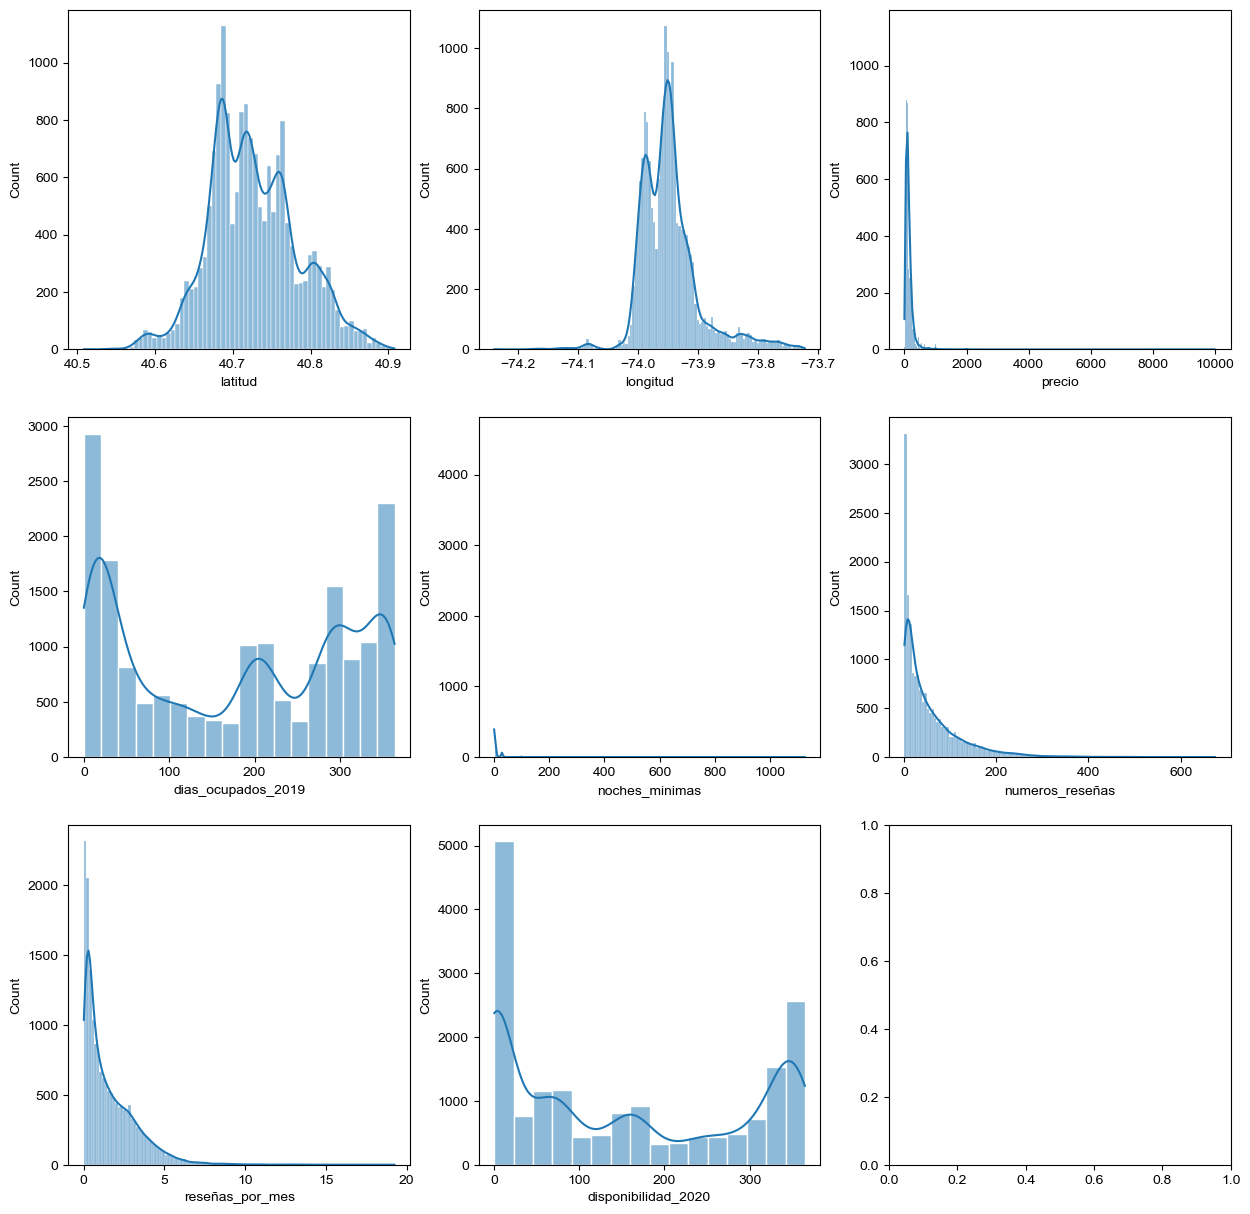

In [5]:
import seaborn as sns

#Creamos una series (subplot) de graficos para que esten todos juntos
fig,ax = plt.subplots(3,3,figsize=(15,15))
sns.set(font_scale =1)
sns.histplot(data['latitud'],kde=True,ax=ax[0,0])
sns.histplot(data['longitud'],kde=True,ax=ax[0,1])
sns.histplot(data['precio'],kde=True,ax=ax[0,2])
sns.histplot(data['dias_ocupados_2019'],kde=True,ax=ax[1,0])
sns.histplot(data['noches_minimas'],kde=True,ax=ax[1,1])
sns.histplot(data['numeros_reseñas'],kde=True,ax=ax[1,2])
sns.histplot(data['reseñas_por_mes'],kde=True,ax=ax[2,0])
sns.histplot(data['disponibilidad_2020'],kde=True,ax=ax[2,1])


**Creamos unos graficos para poder ver mejor como se comportan los datos y ver como van actuando.**

-----

# Conteo de si el data set tiene valores N/A

In [5]:
### Para ver si contiene  valores N/A
print(data.isna().sum())
### que nos diga cuantas filas y columnas componen el dataset
print(f"Numeros de filas{data.shape}columnas")

F1                     0
id                     0
barrio                 0
latitud                0
longitud               0
tipo_habitacion        0
precio                 0
dias_ocupados_2019     0
noches_minimas         0
numeros_reseñas        0
reseñas_por_mes        0
disponibilidad_2020    0
dtype: int64
Numeros de filas(17614, 12)columnas


----
# Hacemos un conteo de los tipos distintos de habitaciónes.

In [6]:
#Creamos un conteo para los distintos tipos de habitacion que contiene el Datasets
habitaciones = data["tipo_habitacion"].value_counts()
print("Cuantos y cuales son los tipos distintos de las habitaciones :\n")
for habitacion , cantidad in habitaciones.items():
    print(f"Tenemos la habitación de tipo {habitacion} con una cantidad de {cantidad}.")

Cuantos y cuales son los tipos distintos de las habitaciones :

Tenemos la habitación de tipo Entire home/apt con una cantidad de 9405.
Tenemos la habitación de tipo Private room con una cantidad de 7752.
Tenemos la habitación de tipo Shared room con una cantidad de 357.
Tenemos la habitación de tipo Hotel room con una cantidad de 100.


-------
# Conteo de los barrios.

In [7]:
#Conteo de los barrios. Creamos un bucle para que nos vaya contando e itarando por barrio y cantidad
barrios = data["barrio"].value_counts()
print("Conteo de lugares y sus respectivos barrios en Nueva Yotk:\n")
for barrio , cantidad in barrios.items():
    print(f"El barrio {barrio} se encuentran {cantidad} lugares para alquilar.")

Conteo de lugares y sus respectivos barrios en Nueva Yotk:

El barrio Brooklyn se encuentran 3875 lugares para alquilar.
El barrio Manhattan se encuentran 3229 lugares para alquilar.
El barrio Queens se encuentran 1099 lugares para alquilar.
El barrio Bedford-Stuyvesant se encuentran 799 lugares para alquilar.
El barrio Harlem se encuentran 632 lugares para alquilar.
El barrio Williamsburg se encuentran 615 lugares para alquilar.
El barrio Midtown se encuentran 430 lugares para alquilar.
El barrio Bushwick se encuentran 361 lugares para alquilar.
El barrio Upper West Side se encuentran 292 lugares para alquilar.
El barrio Upper East Side se encuentran 291 lugares para alquilar.
El barrio Crown Heights se encuentran 262 lugares para alquilar.
El barrio Astoria se encuentran 249 lugares para alquilar.
El barrio The Bronx se encuentran 247 lugares para alquilar.
El barrio East Village se encuentran 239 lugares para alquilar.
El barrio Hell's Kitchen se encuentran 213 lugares para alquilar

**Observación**
* Tenemos 186 barrios en toda la ciudad de NY
* Obtuvimos una lista muy extensa sobre los lugares de alquiler y sus respectivos barrios
    * Tengamos en cuenta que son 17614 filas u tipos de datos de alquileres en la ciudad de NY
    -----
  
# Miraremos la correlacion que tienen entre si las variables.

C:\Users\Acer\AppData\Local\Temp\ipykernel_10840\949936012.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = data.corr()


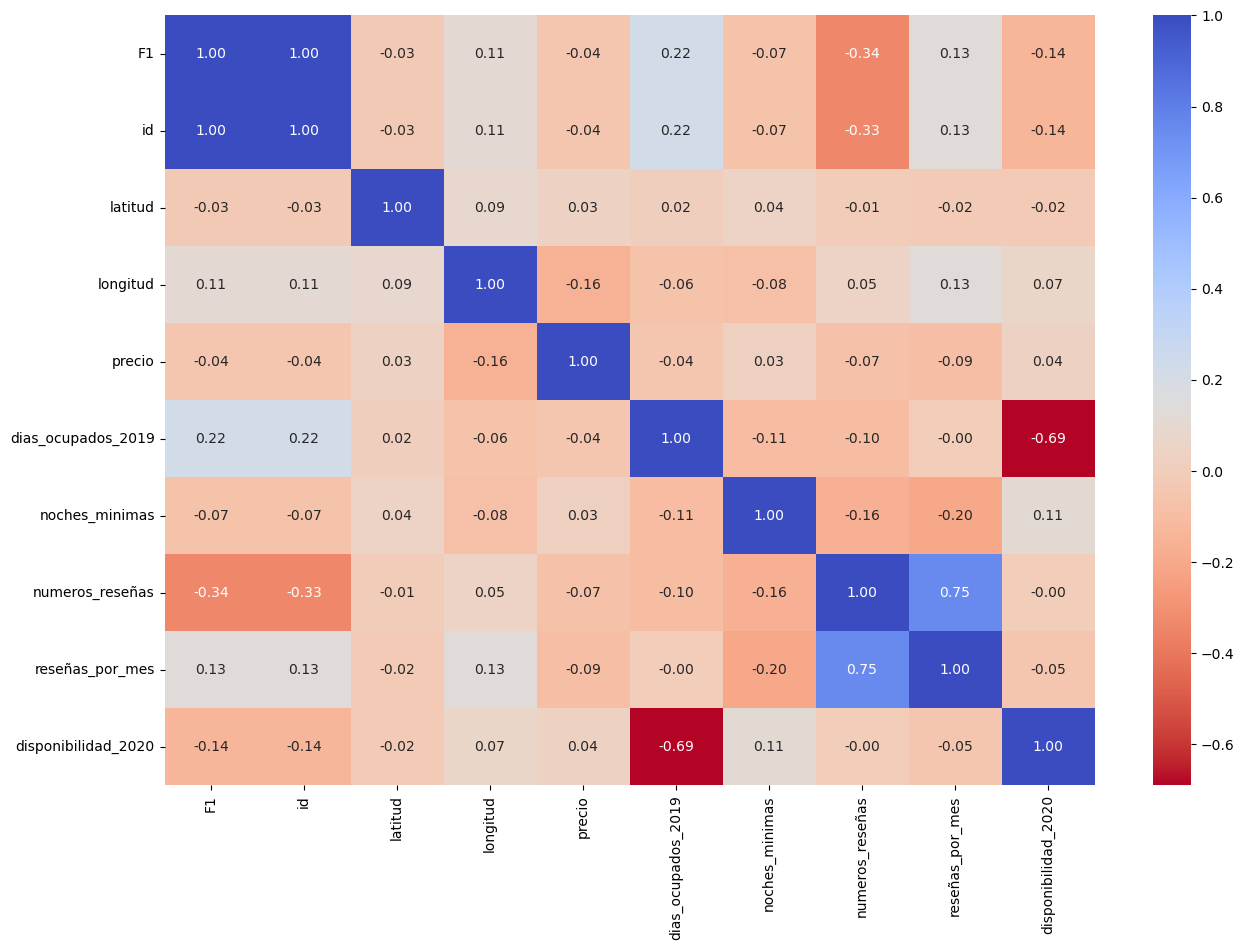

In [8]:
correlacion = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlacion, annot=True , fmt='.2f' , cmap=plt.cm.coolwarm_r)
plt.show()

**Observación**
* Las "unicas" variables que estan altamente correlacionadas con un **%75** son: **Las reseñas por mes y Numeros de reseñas**.
* Luego se puede observar que los **Dias ocupados en 2019** tiene una baja correlacion con el **ID** del lugar. solamente un **%22.** 
* Tambien vemos que **Reseñas por mes y ID** tiene una correlacion baja de **%13.** Lo mismo pasa con la **Longitud y Reseñas por mes.**
* Esto siver para ver que variables podremos usar para nuestros modelos predictorios

-----
# Crearemos una variable dummi para los barrios (pasarlos a valores numericos).

In [9]:
barrios_dummy = pd.get_dummies(data["barrio"], prefix="barrio")
barrios_dummy.head()

,barrio_Allerton,barrio_Alphabet City,barrio_Annadale,barrio_Astoria,barrio_Bath Beach,barrio_Battery Park City,barrio_Bay Ridge,barrio_Baychester,barrio_Bayside,barrio_Bedford Park,...,barrio_West Village,barrio_Westchester Village,barrio_Westerleigh,barrio_Whitestone,barrio_Williamsbridge,barrio_Williamsburg,barrio_Windsor Terrace,barrio_Woodhaven,barrio_Woodlawn,barrio_Woodside
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Crearemos también una variable dummi para los 4 tipos distintos de habitación.
----


In [10]:
habitaciones_dummy = pd.get_dummies(data["tipo_habitacion"] , prefix="habitacion")
habitaciones_dummy.head()

#ahora lo concatenaremos a al dataset original

data_habitacion_dummy = pd.concat([data,habitaciones_dummy], axis=1)
data_habitacion_dummy = data_habitacion_dummy.drop(["tipo_habitacion"], axis=1)
data_habitacion_dummy.head()

,F1,id,barrio,latitud,longitud,precio,dias_ocupados_2019,noches_minimas,numeros_reseñas,reseñas_por_mes,disponibilidad_2020,habitacion_Entire home/apt,habitacion_Hotel room,habitacion_Private room,habitacion_Shared room
0,0,2595,Midtown,40.75362,-73.98377,225,15,10,48,0.39,1,1,0,0,0
1,1,3831,Brooklyn,40.68514,-73.95976,89,188,1,295,4.67,1,1,0,0,0
2,2,5099,Manhattan,40.74767,-73.97500,200,362,3,78,0.60,19,1,0,0,0
3,3,5121,Bedford-Stuyvesant,40.68688,-73.95596,60,0,29,49,0.38,365,0,0,1,0
4,4,5178,Manhattan,40.76489,-73.98493,79,141,2,454,3.52,242,0,0,1,0


In [11]:
data_habitacion_dummy.rename(columns={"habitacion_Entire home/apt":"habitacion_entire_home/apt",
                                      "habitacion_Hotel room":"habitacion_hotel_room",
                                      "habitacion_Private room":"habitacion_private_room",
                                      "habitacion_Shared room":"habitacion_shared_room",})
data_habitacion_dummy.head()

,F1,id,barrio,latitud,longitud,precio,dias_ocupados_2019,noches_minimas,numeros_reseñas,reseñas_por_mes,disponibilidad_2020,habitacion_Entire home/apt,habitacion_Hotel room,habitacion_Private room,habitacion_Shared room
0,0,2595,Midtown,40.75362,-73.98377,225,15,10,48,0.39,1,1,0,0,0
1,1,3831,Brooklyn,40.68514,-73.95976,89,188,1,295,4.67,1,1,0,0,0
2,2,5099,Manhattan,40.74767,-73.97500,200,362,3,78,0.60,19,1,0,0,0
3,3,5121,Bedford-Stuyvesant,40.68688,-73.95596,60,0,29,49,0.38,365,0,0,1,0
4,4,5178,Manhattan,40.76489,-73.98493,79,141,2,454,3.52,242,0,0,1,0


----
# Crearemos una Regresión lineal.

In [12]:
X = data_habitacion_dummy[["latitud","longitud","dias_ocupados_2019","noches_minimas","numeros_reseñas",
                          "reseñas_por_mes","disponibilidad_2020","habitacion_Entire home/apt","habitacion_Hotel room",
                          "habitacion_Private room","habitacion_Shared room"]]
Y = data_habitacion_dummy["precio"]

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [20]:
lm.intercept_ , lm.coef_

(-41900.89233807499,
 array([ 1.82160742e+02, -4.68466648e+02, -1.01761454e-01, -3.27056937e-01,
        -1.09895914e-01, -4.58199957e+00,  7.60583491e-03,  6.80597191e+01,
         3.15566912e+01, -3.80373357e+01, -6.15790746e+01]))

In [21]:
lm.score(X,Y)

0.10890997936656233

In [22]:
lm.predict(X)

array([237.95438618, 152.81566626, 195.6180589 , ...,  56.52744793,
        57.15479743,  44.32793114])

**Observación**
* Vemos que nos da un resultado casi nuli. solamente un %10 de acierto.
* Lo que voy a hacer ahora es aplicar el RFE = eliminar variables que no aporten y hagan decrecer el modelo. Veremos si asi mejor un poco mas.
-----

In [13]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [16]:
#el estimador obviamente sera lineal, asi nos elige las mejores variables para la predicción
estimator =  SVR(kernel="linear")

#Indicamos que nos separe entre los grupo de 4 variables posibles
selector = RFE(estimator , n_features_to_select=2 , step=1)
selector = selector.fit(X,Y)

#Que no indique el ranking de las mejores variables a usar

In [17]:
selector.ranking_

array([ 2,  1,  9,  7,  8,  6, 10,  1,  5,  4,  3])

In [25]:
X_1 = X[["latitud","longitud","reseñas_por_mes","habitacion_Entire home/apt",
         "habitacion_Hotel room","habitacion_Private room","habitacion_Shared room"]]
lm1=LinearRegression()
lm1.fit(X_1,Y)

LinearRegression()

In [36]:
lm1.score(X_1,Y)*100

10.334838338913732

**Observación**
* Como podemos ver el resultado es el mismo y sigue siendo malo. intentaremos con otro tipo de modelo.
-------
-----
# Crearemos un SVR (support vector regressión).

In [28]:
from sklearn.preprocessing import StandardScaler

In [64]:
# Normalizamos los datos para poder hacer el preprocesado
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [58]:
### USAREMOS UN KERNER DE TIPO RADIAL PARA LA FUNCION DE DECISIÓN.
regressor = SVR(kernel="rbf", gamma = 0.1)
regressor.fit(X,Y)

SVR(gamma=0.1)

In [60]:
### CAMBIAMOS EL KERNEL AL TIPO POLINOMIO
regressor_polinomio = SVR(kernel="poly", degree = 3)
regressor_polinomio.fit(X,Y)

SVR(kernel='poly')

In [61]:
regressor_polinomio.score(X,Y)*100

6.641900097131415

In [59]:
regressor.score(X,Y)*100

9.776274092497594

# Observacíon
* Vemos que también nos da un resultado realmente bajo. lo que igual podemos hacer para sacarnos la dudas es evaluar el rendimiento del modelo en conjunto con otras métricas y técnicas de validación.
* Intentamos también cambiando el kernel a polinomio de grado 3 y no tuvo ninguna clase de mejora.


------

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size=0.3 , random_state=42)

#Entrenamos el modelo en los datos de entrenamiento
regressor.fit(x_train , y_train)

SVR()

In [39]:
score_test = regressor.score(x_test , y_test) #Evalúamos el modelo con sus datos de prueba 

In [40]:
print("El score en los datos de prueba es de :",score_test)

El score en los datos de prueba es de : 0.12014171166516674


In [44]:
score_train = regressor.score(x_train , y_train) #Evalúamos el modelo en los datos de entrenamiento y vemos su resultado.
print(f"Eficacia del modelo con los datos de entrenamiento son de: %{score_train*100:.2f}")

Eficacia del modelo con los datos de entrenamiento son de: %8.51


**Observación**
* Se puede ver que en los datos de prueba obtuvimos una eficacia apenas mejor, casi nada (%12.01)
* Con los datos de entrenamiento bajo. obtuvimos un resultado de %8.51.
----------

# Hacemos una validación cruzada (cross validation).

In [51]:
from sklearn.model_selection import cross_val_score

In [55]:
X1 = X

In [66]:
#Aplivamos la validacion cruzada con un fold de 5
scores = cross_val_score(regressor , X,Y , cv=5)

print("Eficacia del modelo haciendo la validación cruzada en cada fold son : %",scores)

print("El score promedio en la validación cruzada es de:",scores.mean())


Eficacia del modelo haciendo la validación cruzada en cada fold son : % [0.02641409 0.00916008 0.04334739 0.10762664 0.01155238]
El score promedio en la validación cruzada es de: 0.03962011743204934


**Observación**
* Un resultado realmente bajo. Tenemos un resultado de %3.9, No vemos ningun tipo de mejora aplicando varios modelos de evaluación sobre el rendimiento.Intentaremos con la ultima (metrica de error)
-----

In [23]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [68]:
# Predeciremos los valores para los datos de prueba
y_pred = regressor.predict(x_test)

#Calculamos el error cuadratico medio (MSE)
mse = mean_squared_error(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)

print("El error cuadratico medio (MSE) es de :", mse)
print("El error absoluto medio (MAE) es de: ", mae)

El error cuadratico medio (MSE) es de : 25866.45589261456
El error absoluto medio (MAE) es de:  52.581604935697314


In [78]:
#Creamos una habitación nueva con los siguientes datos indicados.

nueva_habitacion = [[40.706755,-73.9477,190.50,7.392,58.12,1.60,160.15,0,1,0,0]]
nueva_habitacion = scaler.transform(nueva_habitacion)
regressor.predict(nueva_habitacion)

array([85.43243109])

* ## Observación y ejemplo : Creamos una habitación con los respectivos datos indicados (longitud, tipo de habitacion, noches minimas,reseñas,ETC)
* ## El resultado de la predicción nos dice que el alquiler no costara 85.43USD.
* ## El MAE (valor absoluto medio) nos dice que si el valor es de 85.43usd. La habitación nos costara 52.58usd tanto para arriba como para abajo. es decir que nos puede costar entre 138.01usd & 35.85usd.

-----

----
# Crearemos un árbol de decisión y un random forest para ver como se comporta el modelo y si mejora su predicción.

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [96]:
#Separamos en variables de entrenamiento y test (con un 30% para hacer el test)
X_train, X_test , Y_train, Y_test = train_test_split(X,Y , test_size=0.3 , random_state=42)

In [97]:
regresor1 = RandomForestRegressor(min_samples_split=450, min_samples_leaf=450 ,n_estimators=1000, random_state=42 ,
                                  max_depth=4,n_jobs=2, oob_score=True)
regresor1.fit(X_train, Y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=450, min_samples_split=450,
                      n_estimators=1000, n_jobs=2, oob_score=True,
                      random_state=42)

In [98]:
Y_pred = regresor1.predict(X_test)
mse1 = mean_squared_error(Y_test , Y_pred)
mae1 = mean_absolute_error(Y_test , Y_pred)
R2 = r2_score(Y_test, Y_pred)

print("MSE:",mse1)
print("MAE:", mae1)
print("R2",R2)

MSE: 24977.158151508353
MAE: 61.28796733487618
R2 0.1564047131758839


In [100]:
from sklearn.tree import export_graphviz
import pydot
import graphviz

In [101]:
tree = regresor1.estimators_[0]
export_graphviz(tree, out_file="arbol_ny2" , filled=True , rounded=True, special_characters=True)

In [102]:
(graph,) = pydot.graph_from_dot_file("./arbol_ny2")
graph.write_png("./arbol_ny2")

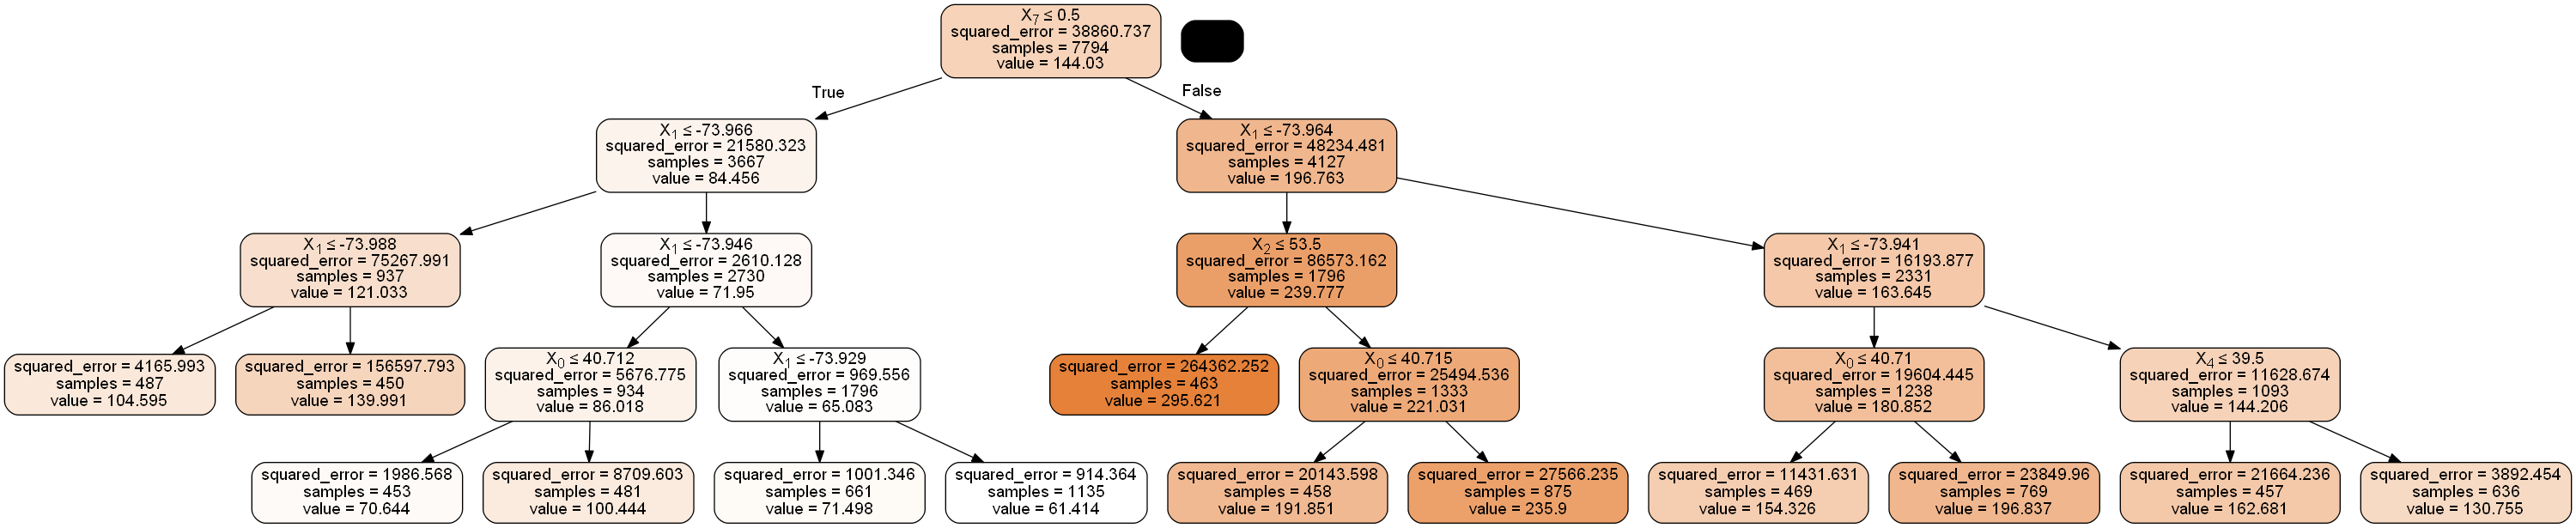

In [104]:
from PIL import Image
im = Image.open("./arbol_ny2")
im

* ## Resumen sobre Random forest.
* ## Vemos que el resultado del MAE aumento considerablemente a 61.28 (el anterior era de 52.58)
* ## Se puede apreciar también que el R2 tiene una efectivdad del 15%, Lo que significa que nuestro modelo explica solamente el 15% de la variabilidad en los datos. tendremos que buscar que factores influyen en el resultado malo que estamos obteniendo. No tendremos muy en cuenta el Random forest. ya que el modelo no es bueno para predecir.
-----
------

# Ahora crearemos un Árbol de decisión y un random forest (lo valores numericos precios lo pasaremos a variables categoricas).

In [350]:
#Creamos un nuevo dataset solamente para poder hacer el árbol de decisión.
data_arbol_decision = data_habitacion_dummy[["latitud","longitud","dias_ocupados_2019","noches_minimas",
                                             "numeros_reseñas","reseñas_por_mes","disponibilidad_2020",
                                             "habitacion_Entire home/apt","habitacion_Hotel room",
                                             "habitacion_Private room","habitacion_Shared room","precio"]]
data_arbol_decision.head()

,latitud,longitud,dias_ocupados_2019,noches_minimas,numeros_reseñas,reseñas_por_mes,disponibilidad_2020,habitacion_Entire home/apt,habitacion_Hotel room,habitacion_Private room,habitacion_Shared room,precio
0,40.75362,-73.98377,15,10,48,0.39,1,1,0,0,0,225
1,40.68514,-73.95976,188,1,295,4.67,1,1,0,0,0,89
2,40.74767,-73.97500,362,3,78,0.60,19,1,0,0,0,200
3,40.68688,-73.95596,0,29,49,0.38,365,0,0,1,0,60
4,40.76489,-73.98493,141,2,454,3.52,242,0,0,1,0,79


* ## Observación
* ### Al tener muchos tipos de valores "precios" lo que haremos para usar el arbol de decisión es pasar los valores numericos a valores categoricos. Es decir separar de a grupos de precios. pueden ser bastantes grupos pero seria lo mas "acorde" para poder usar el árbol de decisión y asi ver seguramente una eficacia muchisima mas alta de la que venimos teniendo.
------

In [351]:
#Hacemos una vista rapida de como se compone y como es la variable "precio"
data_arbol_decision.describe()['precio']

count    17614.000000
mean       145.455490
std        194.990677
min          0.000000
25%         70.000000
50%        109.000000
75%        170.000000
max       9999.000000
Name: precio, dtype: float64

In [352]:
#Pasamos las variables precio que son numericas a variables categoricas.
data_arbol_decision.loc[data["precio"]<=50, "precio"] = "0-50usd"
data_arbol_decision.loc[(data["precio"]>50)&(data["precio"]<=75),"precio"] = "50-75usd"
data_arbol_decision.loc[(data["precio"]>75)&(data["precio"]<=100),"precio"] = "75-100usd"
data_arbol_decision.loc[(data["precio"]>100)&(data["precio"]<=125),"precio"] = "100-125usd"
data_arbol_decision.loc[(data["precio"]>125)&(data["precio"]<=150),"precio"] = "125-150usd"
data_arbol_decision.loc[(data["precio"]>150)&(data["precio"]<=175),"precio"] = "150-175usd"
data_arbol_decision.loc[(data["precio"]>175)&(data["precio"]<=200),"precio"] = "175-200usd"
data_arbol_decision.loc[(data["precio"]>200)&(data["precio"]<=225),"precio"] = "200-225usd"
data_arbol_decision.loc[(data["precio"]>225)&(data["precio"]<=250),"precio"] = "225-250usd"
data_arbol_decision.loc[(data["precio"]>250)&(data["precio"]<=275),"precio"] = "250-275usd"
data_arbol_decision.loc[(data["precio"]>275)&(data["precio"]<=300),"precio"] = "275-300usd"
data_arbol_decision.loc[(data["precio"]>300)&(data["precio"]<=325),"precio"] = "300-325usd"
data_arbol_decision.loc[(data["precio"]>325)&(data["precio"]<=350),"precio"] = "325-350usd"
data_arbol_decision.loc[(data["precio"]>350)&(data["precio"]<=375),"precio"] = "350-375usd"
data_arbol_decision.loc[(data["precio"]>375)&(data["precio"]<=400),"precio"] = "375-400usd"
data_arbol_decision.loc[(data["precio"]>400)&(data["precio"]<=450),"precio"] = "400-450usd"
data_arbol_decision.loc[(data["precio"]>450)&(data["precio"]<=500),"precio"] = "450-500usd"
data_arbol_decision.loc[(data["precio"]>500)&(data["precio"]<=550),"precio"] = "500-550usd"
data_arbol_decision.loc[(data["precio"]>550)&(data["precio"]<=600),"precio"] = "550-600usd"
data_arbol_decision.loc[(data["precio"]>600)&(data["precio"]<=650),"precio"] = "600-650usd"
data_arbol_decision.loc[(data["precio"]>650)&(data["precio"]<=700),"precio"] = "650-700usd"
data_arbol_decision.loc[(data["precio"]>700)&(data["precio"]<=750),"precio"] = "700-750usd"
data_arbol_decision.loc[(data["precio"]>750)&(data["precio"]<=800),"precio"] = "750-800usd"
data_arbol_decision.loc[(data["precio"]>800)&(data["precio"]<=850),"precio"] = "800-850usd"
data_arbol_decision.loc[(data["precio"]>850)&(data["precio"]<=900),"precio"] = "850-900usd"
data_arbol_decision.loc[(data["precio"]>850)&(data["precio"]<=900),"precio"] = "850-900usd"
data_arbol_decision.loc[(data["precio"]>900)&(data["precio"]<=950),"precio"] = "900-950usd"
data_arbol_decision.loc[(data["precio"]>950)&(data["precio"]<=1000),"precio"] = "950-1000usd"

data_arbol_decision.loc[(data["precio"]>1000)&(data["precio"]<=2000),"precio"] = "1000-2000usd"
data_arbol_decision.loc[(data["precio"]>2000)&(data["precio"]<=3000),"precio"] = "2000-3000usd"
data_arbol_decision.loc[(data["precio"]>3000)&(data["precio"]<=4000),"precio"] = "3000-4000usd"
data_arbol_decision.loc[(data["precio"]>4000)&(data["precio"]<=5000),"precio"] = "4000-5000usd"

data_arbol_decision.loc[(data["precio"]>5000)&(data["precio"]<=7000),"precio"] = "5000-7000usd"
data_arbol_decision.loc[(data["precio"]>7000)&(data["precio"]<=9999),"precio"] = "7000-9999usd"

* ### Observación
* ### Tenemos varios tipos de precios, trataremos de ir dividiendolo a un numeros razonable y bueno
----

In [353]:
#Indicamos cuales son las variables predictoras y cual es la variable a predecir
columnas = data_arbol_decision.columns.values.tolist()
predictoras = columnas[:11]
target = columnas[11]

In [354]:
#Creamos una columna para poder entrenar y tengo el 70% de los datos
data_arbol_decision["is_train"] = (np.random.uniform(0,1,len(data_arbol_decision))<0.70).astype(int)

C:\Users\Acer\AppData\Local\Temp\ipykernel_10840\380755767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_arbol_decision["is_train"] = (np.random.uniform(0,1,len(data_arbol_decision))<0.70).astype(int)


(array([ 5257.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

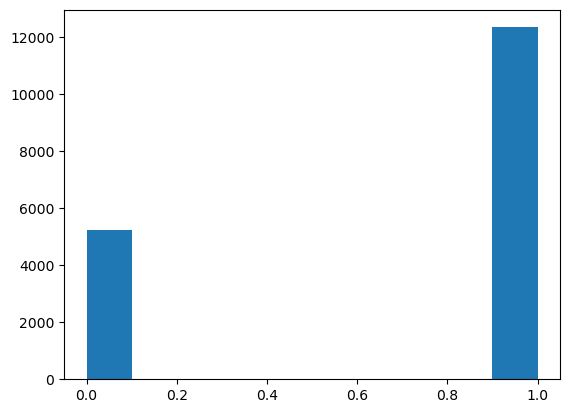

In [355]:
plt.hist(data_arbol_decision.is_train)

* ### Hacemos una tabla de doble entrada para que nos diga como fue en la prediccion
* Las columnas que estan en vertical son las actuales y las que se encuentran arriba en horizontal son las que predice.
* ejemplo : 0-50usd clasifico 337 veces bien luego clasifico 1 vez 100-125usd y asi sucesivamente.

In [356]:
pd.crosstab(test[target], preds,rownames=["Actual"], colnames=["Predictions"])

Predictions,0-50usd,100-125usd,125-150usd,175-200usd,50-75usd,75-100usd
Actual,,,,,,
0-50usd,337,1,1,0,295,29
100-125usd,12,20,149,45,74,253
1000-2000usd,0,1,3,9,1,1
125-150usd,8,29,234,120,39,218
150-175usd,1,11,125,91,18,84
175-200usd,0,14,156,163,16,78
200-225usd,0,3,54,67,3,18
2000-3000usd,0,0,0,2,0,0
225-250usd,0,7,58,86,1,28


In [357]:
##### Separamos en entrenamiento y test
train , test = data_arbol_decision[data_arbol_decision["is_train"] ==True],data_arbol_decision[data_arbol_decision["is_train"]==False]

In [358]:
from sklearn.tree import DecisionTreeClassifier

In [359]:
arbol_tree = DecisionTreeClassifier(criterion="entropy" , min_samples_split=150 ,min_samples_leaf=150,random_state=42)
arbol_tree.fit(train[predictoras], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=150,
                       min_samples_split=150, random_state=42)

In [360]:
#Hacemos una prediccion con el arbol creado.
preds = arbol_tree.predict(test[predictoras])

In [361]:
arbol_tree.score(train[predictoras], train[target])*100

32.799223112405926

In [362]:
arbol_tree.score(test[predictoras], test[target])*100

31.177477648849155

**Observación** 
* Vemos que el modelo mejora bastante tiene una eficacia del %32.96 para las variables de entrenamiento y %30.84 para las variables de test.
* Intentaremos con un random forest y la nueva variable precios asi vemos como se comporta el modelo.
-----
* ## Creamos una validación cruzada para el árbol de decisión asi vemos como se comporta

In [363]:
x = data_arbol_decision[predictoras]
y = data_arbol_decision[target]
#### Cremos un nuevo árbol, ajustamos y luego modelamos los datos creados
arbol_tree = DecisionTreeClassifier(criterion="entropy" , min_samples_split=150 ,min_samples_leaf=150,random_state=42)
arbol_tree.fit(x,y)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=150,
                       min_samples_split=150, random_state=42)

In [364]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=350 ,shuffle=True , random_state=9)

In [365]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [366]:
score = np.mean(cross_val_score(arbol_tree,x,y,scoring="accuracy" , cv=cv, n_jobs=3))
score*100

31.54487394957983

**Observación**
* Con la validación cruzada nos arroja el mismo resultado.
-----
----

* ## Haremos un random forest ahora con las variables categoricas

In [377]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_jobs=1 , oob_score=True , n_estimators=900)
forest.fit(x,y)

RandomForestClassifier(n_estimators=900, n_jobs=1, oob_score=True)

In [378]:
forest.oob_score_*100

34.85863517656409

* # Resumen para el Árbol de decisión y el random forest con las variables categoricas de "precios".
* ## Vemos que el Score es una medida de precisión del modelo. usamos la validación cruzada para evaluar la capacidad del modelo para predecir. con el resultado a %31.51 indica que el modelo puede predecir correctamente un tercio de las veces.

* ## el oob_score es otra metrica de evaluación del modelo (este caso para el random forest) el resultado que obtuvimos fue de %34.85 mejoro el modelo a comparación de los demas metodos usados que vimos.

----
